# HSE 2021: Mathematical Methods for Data Analysis

## Homework 5

### Contents

#### PCA, t-SNE – 4 points
* [Task 1](#task1) (1.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (0.5 points)
* [Task 4](#task3) (1 points)
* [Task 5](#task4) (0.5 points)

#### Clustering – 6 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.5 points)
* [Task 7](#task7) (1.5 points)
* [Task 8](#task8) (0.5 point)
* [Task 9](#task8) (1 point)

Load the file `data_Mar_64.txt`.

In [1]:
import pandas as pd
data = pd.read_csv('data_Mar_64.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


This [dataset](https://archive.ics.uci.edu/ml/datasets/One-hundred+plant+species+leaves+data+set) consists of work carried out by James Cope, Charles Mallah, and James Orwell, Kingston University London. The Leaves were collected in the Royal Botanic Gardens, Kew, UK. 

For Each feature, a 64 element vector is given per sample of leaf. One file for each 64-element feature vectors. **Each row begins with the class label**. Here is the plant leaf **classification task**. The remaining 64 elements is the feature vector.

In [2]:
#Sixteen samples of leaf each of one-hundred plant species
data.shape

(1600, 65)

The first column is the target, put it in a separate variable.

In [3]:
import numpy as np
X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

**Task 1. <a id="task1"></a> (1.5 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics.
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y_name)

Split your data into **train** and **test** in proportion 1:4.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Train SVM with linear kernel on your data to predict target. Calculate accuracy, F-score.

In [6]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.svm import SVC

model = SVC(kernel = 'linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'f1: {f1:.4f}')

Accuracy: 0.0094
f1: 0.0117


Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=42`

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state = 42)
X_pca = pca.fit_transform(X)

Select objects that match values from 0 to 15 of the target variable `y`. Draw the selected objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y[y<=15]` to the `scatter` method.

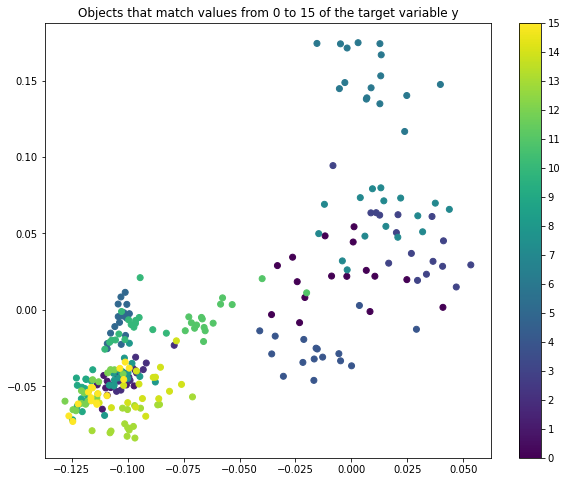

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10, 8))
plt.title('Objects that match values from 0 to 15 of the target variable y')
plt.scatter(X_pca[:, 0][y<=15], X_pca[:, 1][y<=15], c = y[y<=15])
plt.colorbar(ticks = np.arange(16))
plt.show()

Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


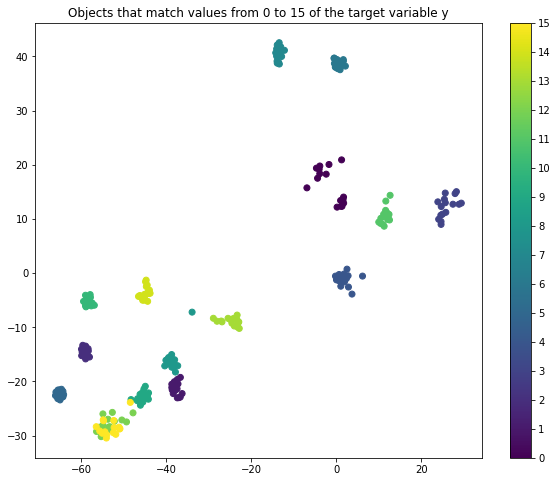

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(init = 'pca', n_components = 2, random_state = 42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize = (10, 8))
plt.title('Objects that match values from 0 to 15 of the target variable y')
plt.scatter(X_tsne[:, 0][y<=15], X_tsne[:, 1][y<=15], c = y[y<=15])
plt.colorbar(ticks = np.arange(16))
plt.show()

**Task 2. <a id="task2"></a> (0.5 points)** Specify the coordinates of the object with index 1 (`X[1]`) after applying the TSNE method. Round the numbers to hundredths.

In [10]:
print(f'Coordinates of the object with index 1 after applying the TSNE method: {X_tsne[1][0]:.2f}, {X_tsne[1][1]:.2f}')

Coordinates of the object with index 1 after applying the TSNE method: 1.17, 12.31


**Task 3. <a id="task3"></a> (0.5 points)** Specify the coordinates of the object with index 1 (`X[1]`) after applying the PCA method. Round the numbers to hundredths.

In [11]:
print(f'Coordinates of the object with index 1 after applying the PCA method: {X_pca[1][0]:.2f}, {X_pca[1][1]:.2f}')

Coordinates of the object with index 1 after applying the PCA method: -0.02, 0.02


**Task 4. <a id="task4"></a> (1 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

**Ответ: 2**

1) Кажется, что довольно сложно разделить объекты разных классов (все друг на друга накладывается)

2) Да, вполне

3) Про рса такое сказать нельзя

4) Про tsne такое сказать нельзя (объекты вполне различимы)

**Task 5. (0.5 points)** Again try to fit your simple classifier, this time using transformed data to two-dimensional space. To do it choose the best feature representation in your opinion from two existing. Did the metrics improve?

In [ ]:
tsne = TSNE(init = 'pca', n_components = 2, random_state = 42)
tsne_X = tsne.fit_transform(X)

tsne_X_train, tsne_X_test, tsne_y_train, tsne_y_test = train_test_split(tsne_X, y, test_size = 0.2, random_state = 42)

model_pca = SVC(kernel = 'linear')
model_pca.fit(tsne_X_train, tsne_y_train)
tsne_y_pred = model_pca.predict(tsne_X_test)

accuracy = accuracy_score(tsne_y_test, tsne_y_pred)
f1 = f1_score(tsne_y_test, tsne_y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'f1: {f1:.4f}')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


Accuracy: 0.6969
f1: 0.6910


Мы улучшили метрики в 69 раз! (Ожидалось улучшение, но чтобы настолько: 😰)

А ведь это самая простая модель, для которой мы даже не подбирали гиперпараметры))

TSNE - WINNER!

In [ ]:
pca = PCA(n_components = 2, random_state = 42)
pca_X = pca.fit_transform(X)

pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_X, y, test_size = 0.2, random_state = 42)

model_pca = SVC(kernel = 'linear')
model_pca.fit(pca_X_train, pca_y_train)
y_pred = model_pca.predict(pca_X_test)

accuracy = accuracy_score(pca_y_test, y_pred)
f1 = f1_score(pca_y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'f1: {f1:.4f}')

Accuracy: 0.0000
f1: 0.0000


Видимо, n_components = 2 - слишком сильное сжатие для pca (улучшение метрик проявляется только при n_cimponents = 6)

## K_means

**Task 6. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [67]:
from IPython.display import clear_output
from sklearn.metrics import pairwise_distances_argmin
import random

def plot_clust(X, centers, labels, ax, index = 0): 
    ax.scatter(X[:,0], X[:,1], c=labels)
    ax.scatter(centers[:,0], centers[:,1], marker='>', color='red')


class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None 
        self.centers = None 
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)


    def update_centers(self, X):
        centers = np.zeros(self.centers.shape)
        for i in range(self.n_clusters):
          centers[i] = np.mean(X[self.labels == i], axis = 0)
        return centers
    

    def update_labels(self, X):
        labels = pairwise_distances_argmin(X, self.centers, axis = 1)
        return labels 


    def fit(self, X):
        random.seed(self.seed)
        self.centers = X[random.sample(range(len(X)), self.n_clusters)]
        self.labels = self.update_labels(X)

        for it in range(self.n_iters):
            new_labels = self.update_labels(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)
            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
                print('Converge by tolerance centers')

                fig, ax = plt.subplots(1,1)
                plot_clust(X, new_centers, new_labels, ax)
                return 0
      
            self.centers = new_centers

            fig, ax = plt.subplots(1,1)
            plot_clust(X, new_centers, new_labels, ax)
            plt.pause(0.3);
            clear_output(wait=True);
            
        return 1
    
    
    def predict(self, X):
        labels = self.update_labels(X)
        return labels

Generating data for clustering

In [13]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 0.5, 0.5],
                             random_state=0)

In [14]:
X, y = noisy_blobs

**Task 7. <a id="task6"></a> (1.5 points)** 

7.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=3`. Plot result. Specify the result label for the object with index 0.

Class of object with index 0: 1


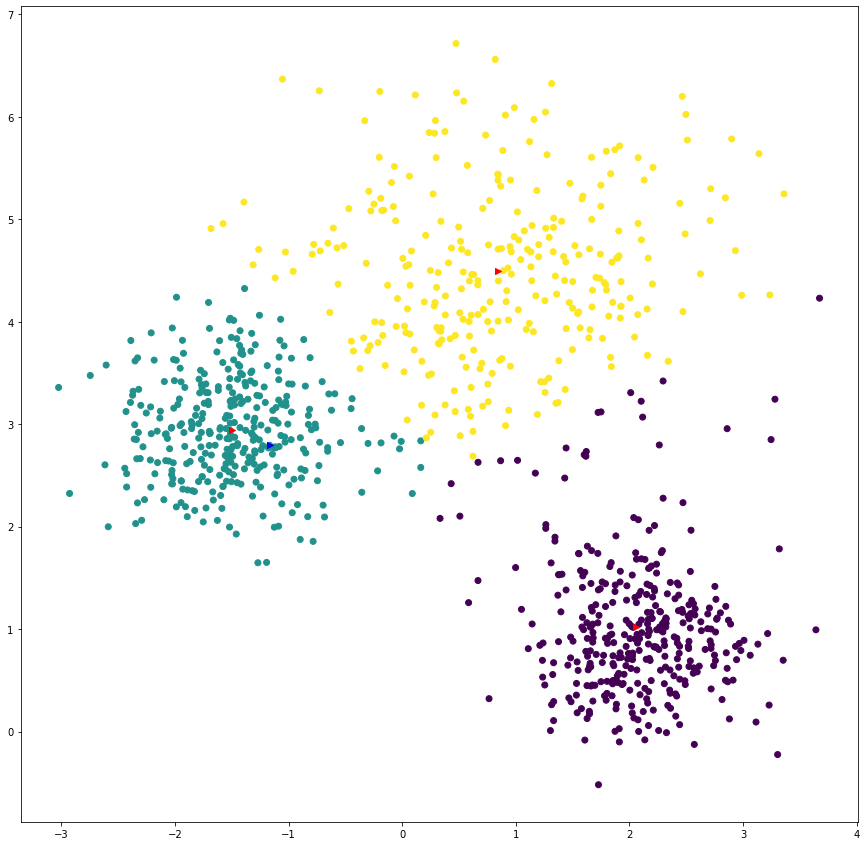

In [68]:
model_niters3 = MyKMeans(n_clusters = 3, n_iters = 3, seed = 42)
model_niters3.fit(X)

pred_niters3 = model_niters3.predict(X)

print(f'Class of object with index 0: {pred_niters3[0]}')

plt.figure(figsize = (15, 15))
plt.scatter(X[:, 0], X[:, 1], c = model_niters3.labels)
plt.scatter(model_niters3.centers[:, 0], model_niters3.centers[:, 1], marker = '>', color = 'red')
plt.scatter(X[0][0], X[0][1], marker='>', color='blue')

**Отсюда и дальше графики будут сильно увеличины, чтобы было четче видно объекты**

Голубая стрелочка - объект с индексом 0, здесь его предсказание - 1 класс)

7.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 100`. Plot result. Specify the result label for the object with index 0.

Converge by tolerance centers
Class of object with index 0: 1


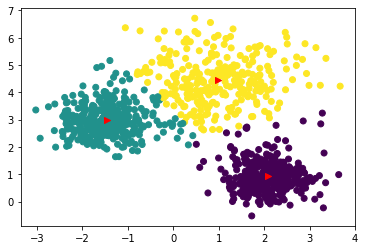

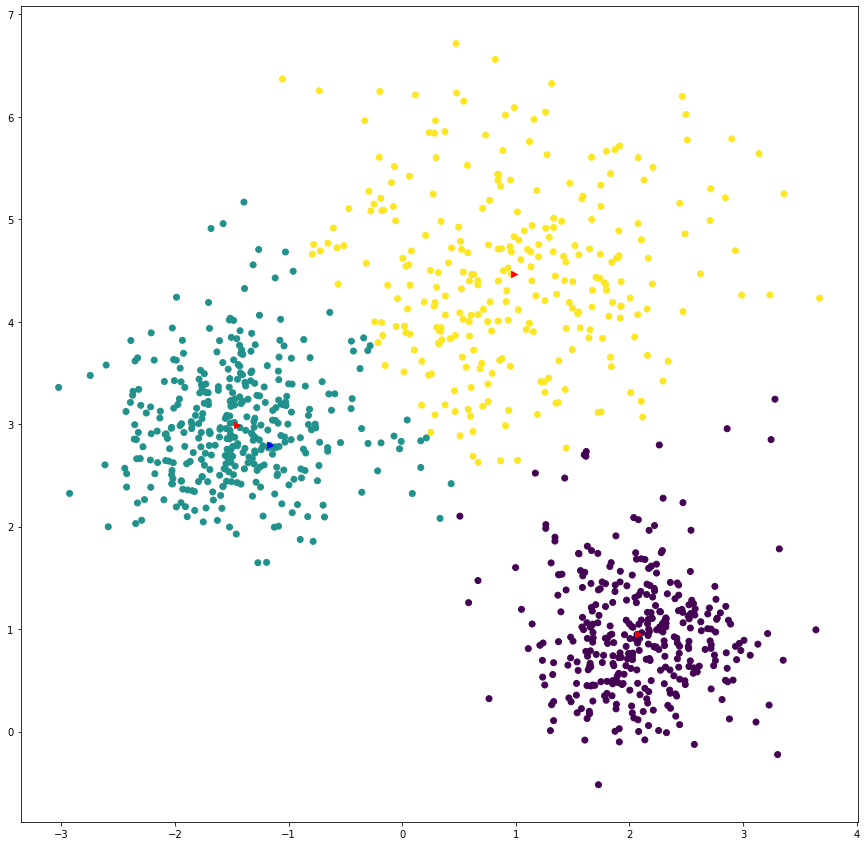

In [69]:
model_niters100 = MyKMeans(n_clusters = 3, n_iters = 100, seed = 42)
model_niters100.fit(X)

pred_niters100 = model_niters100.predict(X)

print(f'Class of object with index 0: {pred_niters100[0]}')

plt.figure(figsize = (15, 15))
plt.scatter(X[:,0], X[:,1], c = model_niters100.labels)
plt.scatter(model_niters100.centers[:,0], model_niters100.centers[:,1], marker='>', color='red')
plt.scatter(X[0][0], X[0][1], marker='>', color='blue')

In [ ]:
print(f'Class of object with index 0: {pred_niters100[0]}')

Class of object with index 0: 1


Здесь его тоже отнесли к 1 классу

7.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 3 to 100

Number of objects that changed the label of the predicted cluster: 4
[ 13  26 102 338]


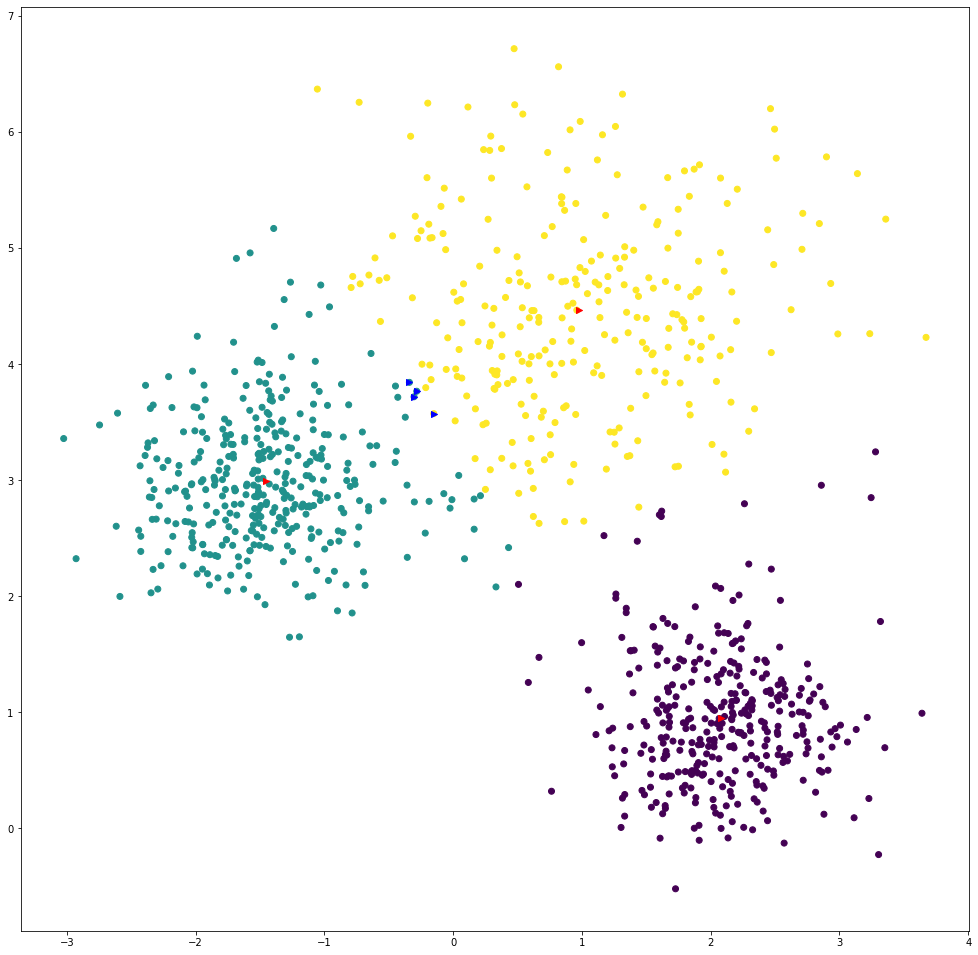

In [70]:
num_of_changed = len(X) - np.sum(pred_niters3 == pred_niters100)

print(f'Number of objects that changed the label of the predicted cluster: {num_of_changed}')

changed = np.where((pred_niters3 == pred_niters100) == 0)[0]
print(changed)

plt.figure(figsize = (17, 17))
plt.scatter(X[:,0], X[:,1], c = model_niters100.labels)
plt.scatter(model_niters100.centers[:,0], model_niters100.centers[:,1], marker='>', color='red')
for obj in changed:
  plt.scatter(X[obj][0], X[obj][1], marker='>', color='blue')

Поменяв n_iters с 3 на 100, предсказания изменились только для 4 объектов, граничащих между "зеленым" и "желтым" кластером

**Task 8. <a id="task6"></a> (1.5 points)** 

Using the elbow method, select the optimal number of clusters, show it on the plot. As a metric, use the sum of the squares of the distances between the data points and the centroids of the clusters assigned to them divided by number of clusters. To do this, iterate the parameter k from 2 to 50 in steps of 2. 

Converge by tolerance centers


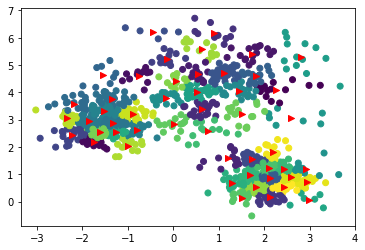

In [71]:
metrics = []
clusters = range(2, 51, 2)

for k in clusters:
  model = MyKMeans(n_clusters = k, n_iters = 50, seed = 42)
  model.fit(X)
  labels = model.predict(X)
  metrics.append(np.sum((X - model.centers[labels])**2) / k)

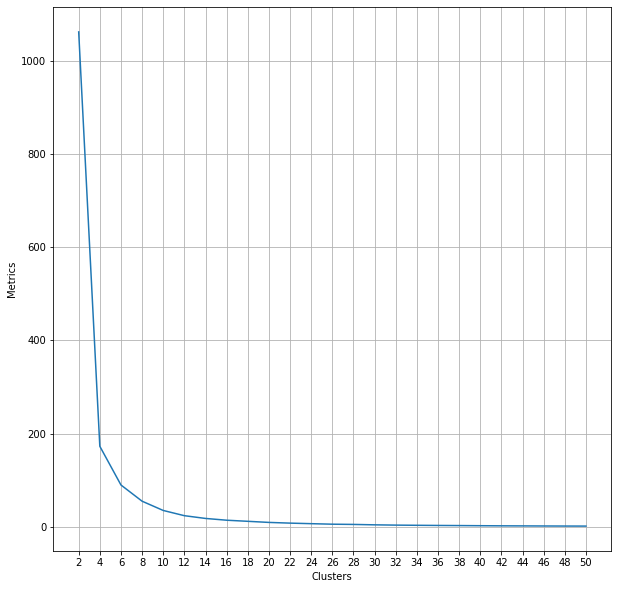

In [73]:
plt.figure(figsize = (10,10))
plt.plot(clusters, metrics)
plt.xlabel("Clusters")
plt.ylabel("Metrics")
plt.xticks(clusters)
plt.grid()
plt.show()

Судя по графику, оптимальное число кластеров ~ [4, 6]

## DBSCAN

**Task 9. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.3` hyperparameter. Plot result. Specify the response for the object with index 2.

In [74]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.3)
pred = dbscan.fit_predict(X)

print(f'Response for the object with index 2: {pred[2]}')

Response for the object with index 2: 0


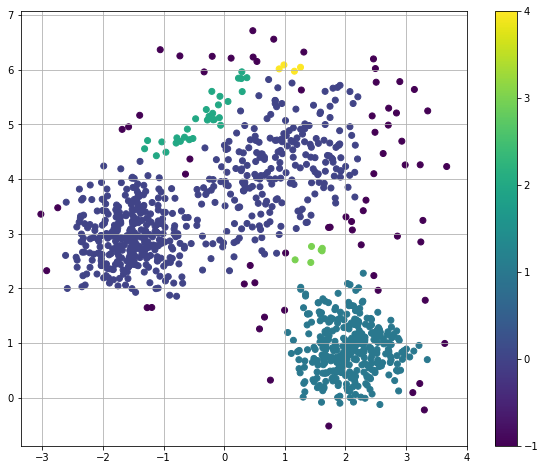

In [75]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:,0], X[:,1], c = dbscan.labels_)
plt.colorbar(ticks = np.unique(pred))
plt.grid()
plt.show()

**Task 10. <a id="task8"></a> (1 point)** 

Try different settings of ```eps``` distances (from 0.1 to 0.5) and several values of your choice of ```min_samples```. For each setting plot results. Also output the number of clusters and outliers (objects marked as -1).

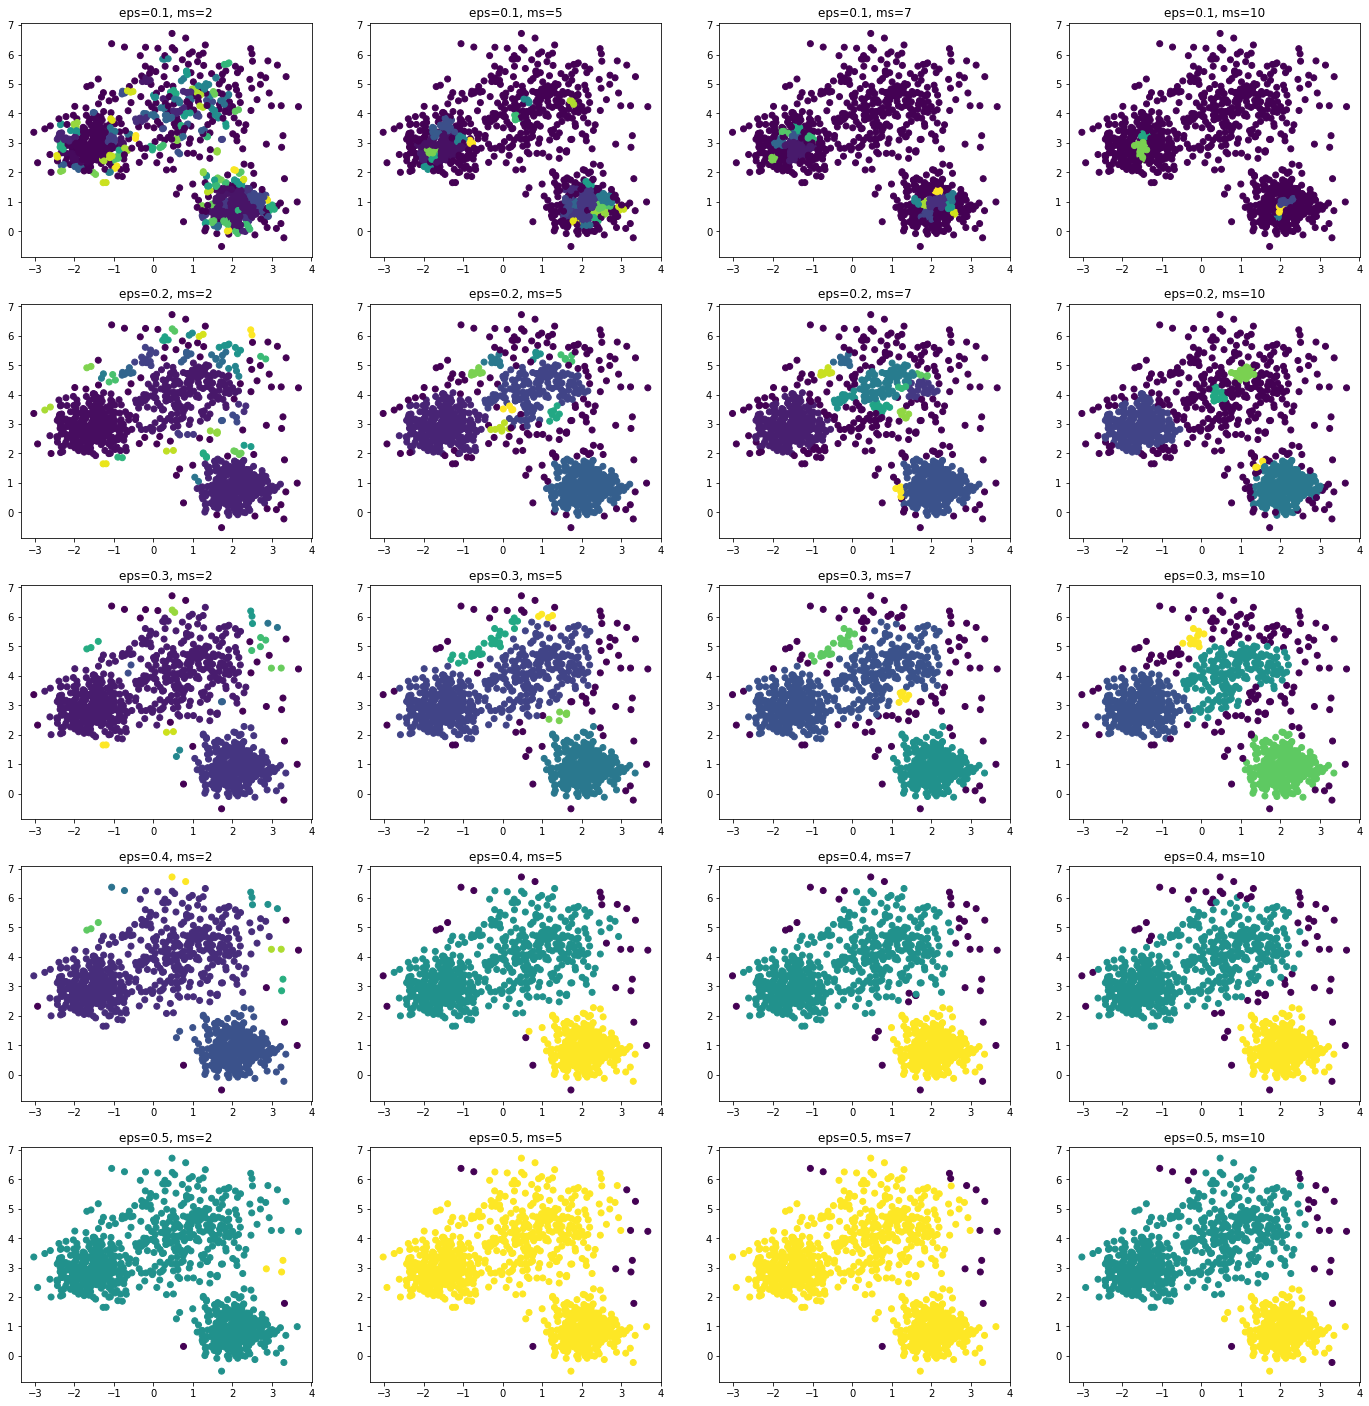

In [76]:
eps_range = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_range = [2, 5, 7, 10]
iter_x = 0
fig, axs = plt.subplots(5, 4, figsize = (24,25))
for eps in eps_range:
  iter_y = 0
  for min_samples in min_samples_range:
    dbscan = DBSCAN(eps = eps, min_samples = min_samples)
    pred = dbscan.fit_predict(X)
    axs[iter_x, iter_y].set_title(f'eps={eps}, ms={min_samples}')
    axs[iter_x, iter_y].scatter(X[:,0], X[:,1], c = dbscan.labels_)
    iter_y += 1
  iter_x += 1

(Логика графика: вдоль строки изменение min_samples, вдоль столбца - eps)

[Прости, немного сложно его читать, зато график очень наглядный, на мой взгляд]

1.   При слишком маленьком значении eps и min_samples каждая точка попадает в отдельный кластер;
2.   При слишком маленьком eps и большом min_samples в кластер попадают только супер близкие точки, все остальное попадает в шум;
3.   При слишком большом eps все точки попадают в один кластер

На мой взгляд, идеальное разбиение получается при eps = 0.3 и min_samples = 5